In [46]:
import os, shutil
import glob
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import kerastuner as kt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization



In [13]:
import os, shutil
original_dataset_dir = 'C:/Users/micha/Desktop/rawimgs_copy'
base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Training
train_cans_dir = os.path.join(train_dir, 'AluCan')
os.mkdir(train_cans_dir)
train_glass_dir = os.path.join(train_dir, 'Glass')
os.mkdir(train_glass_dir)
train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
os.mkdir(train_hdpem_dir)
train_pet_dir = os.path.join(train_dir, 'PET')
os.mkdir(train_pet_dir)

# Validation
validation_cans_dir = os.path.join(validation_dir, 'AluCan')
os.mkdir(validation_cans_dir)
validation_glass_dir = os.path.join(validation_dir, 'Glass')
os.mkdir(validation_glass_dir)
validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
os.mkdir(validation_hdpem_dir)
validation_pet_dir = os.path.join(validation_dir, 'PET')
os.mkdir(validation_pet_dir)

# Test
test_cans_dir = os.path.join(test_dir, 'AluCan')
os.mkdir(test_cans_dir)
test_glass_dir = os.path.join(test_dir, 'Glass')
os.mkdir(test_glass_dir)

test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
os.mkdir(test_hdpem_dir)
test_pet_dir = os.path.join(test_dir, 'PET')
os.mkdir(test_pet_dir)

In [16]:
def copy_imgs_to_folders():
### TRAIN ### 
    original_dataset_dir = 'C:/Users/micha/Desktop/rawimgs_copy'
    base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 700):
        shutil.copy(file, train_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 900):
        shutil.copy(file, train_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 700):
        src = file
        shutil.copy(file, train_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 1100):
        src = file
        shutil.copy(file, train_pet_dir)


    ### VALIDATION ###
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 250):
        shutil.copy(file, validation_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 250):
        shutil.copy(file, validation_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 250):
        shutil.copy(file, validation_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 250):
        shutil.copy(file, validation_pet_dir)


    #### TEST ###
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 50):
        shutil.copy(file, test_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 50):
        shutil.copy(file, test_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 50):
        shutil.copy(file, test_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 50):
        shutil.copy(file, test_pet_dir)



In [17]:
copy_imgs_to_folders()

In [2]:
original_dataset_dir = 'C:/Users/micha/Desktop/rawimgs'
base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Training
train_cans_dir = os.path.join(train_dir, 'AluCan')
train_glass_dir = os.path.join(train_dir, 'Glass')
train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
train_pet_dir = os.path.join(train_dir, 'PET')

# Validation
validation_cans_dir = os.path.join(validation_dir, 'AluCan')
validation_glass_dir = os.path.join(validation_dir, 'Glass')
validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
validation_pet_dir = os.path.join(validation_dir, 'PET')

# Test
test_cans_dir = os.path.join(test_dir, 'AluCan')
test_glass_dir = os.path.join(test_dir, 'Glass')
test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
test_pet_dir = os.path.join(test_dir, 'PET')


In [6]:
def mkdir_new_img():
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    
    # Make the folders
    cans_dir = os.path.join(new_dataset_dir, "Cans")
    os.mkdir(cans_dir)
    glass_dir = os.path.join(new_dataset_dir, "Glass")
    os.mkdir(glass_dir)
    pet_dir = os.path.join(new_dataset_dir, "PET")
    os.mkdir(pet_dir)
    

def convert_arr_to_image_folders(imgs, labels):
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    
    # Make the folders
    cans_dir = os.path.join(new_dataset_dir, "Cans")
    glass_dir = os.path.join(new_dataset_dir, "Glass")
    pet_dir = os.path.join(new_dataset_dir, "PET")
    
    for i in range(len(labels)):
        image = PIL.Image.fromarray(x[i], "RGB")
        
        # maybe include crushed cans...
        if labels[i,0] == 2 or labels[i,0] == 3:
            image.save(cans_dir + "/cans_{}.jpg".format(i))
            pass
            
        elif labels[i,0] == 1:
            image.save(glass_dir + "/glass_{}.jpg".format(i))
    
        elif labels[i,0] == 4:
            image.save(pet_dir + "/pet_{}.jpg".format(i))
            
def move_new_images_to_folders():
### TRAIN ### 
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')


    # Training
    train_cans_dir = os.path.join(train_dir, 'AluCan')
    train_glass_dir = os.path.join(train_dir, 'Glass')
    train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
    train_pet_dir = os.path.join(train_dir, 'PET')

    # Validation
    validation_cans_dir = os.path.join(validation_dir, 'AluCan')
    validation_glass_dir = os.path.join(validation_dir, 'Glass')
    validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
    validation_pet_dir = os.path.join(validation_dir, 'PET')

    # Test
    test_cans_dir = os.path.join(test_dir, 'AluCan')
    test_glass_dir = os.path.join(test_dir, 'Glass')
    test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
    test_pet_dir = os.path.join(test_dir, 'PET')

    new_can_src = os.path.join(new_dataset_dir, 'Cans')
#     for file in random.sample(glob.glob(new_can_src + '/*.jpg'), 2500):
#         shutil.move(file, train_cans_dir)

    new_glass_src = os.path.join(new_dataset_dir, 'Glass')
#     for file in random.sample(glob.glob(new_glass_src + '/*.jpg'), 1500):
#         shutil.move(file, train_glass_dir)
    
    new_pet_src = os.path.join(new_dataset_dir, 'PET')
#     for file in random.sample(glob.glob(new_pet_src + '/*.jpg'), 1500):
#         src = file
#         shutil.move(file, train_pet_dir)


    ### VALIDATION ###
    for file in random.sample(glob.glob(new_can_src + '/*.jpg'), 250):
        shutil.copy(file, validation_cans_dir)

    for file in random.sample(glob.glob(new_glass_src + '/*.jpg'), 250):
        shutil.move(file, validation_glass_dir)

    for file in random.sample(glob.glob(new_pet_src + '/*.jpg'), 250):
        shutil.move(file, validation_pet_dir)


    #### TEST ###
    for file in random.sample(glob.glob(new_can_src + '/*.jpg'), 50):
        shutil.move(file, test_cans_dir)

    for file in random.sample(glob.glob(new_glass_src + '/*.jpg'), 50):
        shutil.move(file, test_glass_dir)

    for file in random.sample(glob.glob(new_pet_src + '/*.jpg'), 50):
        shutil.move(file, test_pet_dir)

In [25]:
# # mkdir_new_img()

# x = np.load('C:/Users/micha/Downloads/new_data/x_train.npy')
# y = np.load('C:/Users/micha/Downloads/new_data/y_train.npy')
# convert_arr_to_image_folders(x, y)
move_new_images_to_folders()

# Set memory growth to true and configure the dataset for performance

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available:", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Num GPUs Available: 1


# New Convet that includes dropout

In [53]:
def model_builder1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    # optimizer=optimizers.RMSprop(),

    metrics=['acc'])
    return model
    
def model_builder1_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-3),
    metrics=['acc'])
    return model
    
def model_builder2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (7, 7), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-3),
    # optimizer=optimizers.RMSprop(),

    metrics=['acc'])
    return model
    
def model_builder3():
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu',
    input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    # optimizer=optimizers.RMSprop(),

    metrics=['acc'])
    return model
def model_builder(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_3_kernel', values=[3,5]),
        activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(
        filters=hp.Int('conv_4_filter', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv_4_kernel', values=[3,5,7]),
        activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=512, step=128),
        activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                loss='categorical_crossentropy',
                metrics=['acc'])
    return model

In [5]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [9]:
tuner_search=RandomSearch(
    hypermodel = model_builder, 
    objective='val_acc', 
    max_trials=7, 
    directory='output', 
    project_name="recycling")

In [10]:
tuner_search.search(
    train_generator,
    steps_per_epoch=7900 // 20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1750 // 20,
    verbose = 2)

Epoch 1/10
395/395 - 70s - loss: 24.0876 - acc: 0.3142 - val_loss: 1.3810 - val_acc: 0.2862
Epoch 2/10
395/395 - 74s - loss: 1.3024 - acc: 0.3204 - val_loss: 1.3731 - val_acc: 0.2874
Epoch 3/10
395/395 - 70s - loss: 1.6515 - acc: 0.3209 - val_loss: 1.3762 - val_acc: 0.2856
Epoch 4/10
395/395 - 70s - loss: 1.3003 - acc: 0.3219 - val_loss: 1.3624 - val_acc: 0.2856
Epoch 5/10
395/395 - 69s - loss: 1.2999 - acc: 0.3225 - val_loss: 1.3683 - val_acc: 0.2862
Epoch 6/10
395/395 - 70s - loss: 1.3000 - acc: 0.3253 - val_loss: 1.3742 - val_acc: 0.2856
Epoch 7/10
395/395 - 70s - loss: 1.3003 - acc: 0.3280 - val_loss: 1.3631 - val_acc: 0.2851
Epoch 8/10
395/395 - 71s - loss: 1.3000 - acc: 0.3247 - val_loss: 1.3629 - val_acc: 0.2862
Epoch 9/10
395/395 - 68s - loss: 1.2992 - acc: 0.3214 - val_loss: 1.3756 - val_acc: 0.2845
Epoch 10/10
395/395 - 74s - loss: 1.3002 - acc: 0.3181 - val_loss: 1.3674 - val_acc: 0.2862


Epoch 1/10
395/395 - 75s - loss: 1.2277 - acc: 0.4167 - val_loss: 1.1721 - val_acc: 0.4655
Epoch 2/10
395/395 - 73s - loss: 1.0797 - acc: 0.5178 - val_loss: 1.1221 - val_acc: 0.5184
Epoch 3/10
395/395 - 73s - loss: 1.0088 - acc: 0.5646 - val_loss: 1.0069 - val_acc: 0.5489
Epoch 4/10
395/395 - 73s - loss: 0.9271 - acc: 0.6137 - val_loss: 0.9819 - val_acc: 0.5741
Epoch 5/10
395/395 - 73s - loss: 0.8509 - acc: 0.6503 - val_loss: 0.9912 - val_acc: 0.6006
Epoch 6/10
395/395 - 71s - loss: 0.8013 - acc: 0.6720 - val_loss: 0.8254 - val_acc: 0.6517
Epoch 7/10
395/395 - 74s - loss: 0.7524 - acc: 0.6934 - val_loss: 0.8302 - val_acc: 0.6586
Epoch 8/10
395/395 - 73s - loss: 0.7219 - acc: 0.7124 - val_loss: 0.8510 - val_acc: 0.6707
Epoch 9/10
395/395 - 75s - loss: 0.6873 - acc: 0.7229 - val_loss: 0.8892 - val_acc: 0.6569
Epoch 10/10
395/395 - 74s - loss: 0.6588 - acc: 0.7352 - val_loss: 0.8780 - val_acc: 0.6747


Epoch 1/10
395/395 - 75s - loss: 144.6193 - acc: 0.3186 - val_loss: 1.3726 - val_acc: 0.2874
Epoch 2/10
395/395 - 78s - loss: 1.3033 - acc: 0.3194 - val_loss: 1.3634 - val_acc: 0.2862
Epoch 3/10
395/395 - 76s - loss: 1.2990 - acc: 0.3216 - val_loss: 1.3782 - val_acc: 0.2851
Epoch 4/10
395/395 - 73s - loss: 1.3000 - acc: 0.3235 - val_loss: 1.3683 - val_acc: 0.2856
Epoch 5/10
395/395 - 75s - loss: 1.3011 - acc: 0.3230 - val_loss: 1.3646 - val_acc: 0.2851
Epoch 6/10
395/395 - 75s - loss: 1.2998 - acc: 0.3257 - val_loss: 1.3626 - val_acc: 0.2868
Epoch 7/10
395/395 - 74s - loss: 1.3001 - acc: 0.3241 - val_loss: 1.3721 - val_acc: 0.2856
Epoch 8/10
395/395 - 74s - loss: 1.3007 - acc: 0.3254 - val_loss: 1.3669 - val_acc: 0.2862
Epoch 9/10
395/395 - 73s - loss: 1.2987 - acc: 0.3261 - val_loss: 1.3732 - val_acc: 0.2862
Epoch 10/10
395/395 - 75s - loss: 1.3011 - acc: 0.3259 - val_loss: 1.3632 - val_acc: 0.2856


Epoch 1/10
395/395 - 75s - loss: 1.2315 - acc: 0.4394 - val_loss: 1.1639 - val_acc: 0.4874
Epoch 2/10
395/395 - 72s - loss: 0.9869 - acc: 0.5858 - val_loss: 0.8913 - val_acc: 0.6466
Epoch 3/10
395/395 - 74s - loss: 0.8348 - acc: 0.6646 - val_loss: 0.8599 - val_acc: 0.6471
Epoch 4/10
395/395 - 76s - loss: 0.7894 - acc: 0.6980 - val_loss: 0.7987 - val_acc: 0.6655
Epoch 5/10
395/395 - 74s - loss: 0.7470 - acc: 0.7120 - val_loss: 0.7432 - val_acc: 0.7454
Epoch 6/10
395/395 - 73s - loss: 0.7521 - acc: 0.7142 - val_loss: 1.2642 - val_acc: 0.4408
Epoch 7/10
395/395 - 74s - loss: 0.7470 - acc: 0.7167 - val_loss: 0.6589 - val_acc: 0.7575
Epoch 8/10
395/395 - 73s - loss: 0.7333 - acc: 0.7377 - val_loss: 0.6830 - val_acc: 0.7575
Epoch 9/10
395/395 - 73s - loss: 0.7411 - acc: 0.7332 - val_loss: 0.7318 - val_acc: 0.7098
Epoch 10/10
395/395 - 74s - loss: 0.7279 - acc: 0.7384 - val_loss: 0.6623 - val_acc: 0.7454


Epoch 1/10
395/395 - 74s - loss: 59.1394 - acc: 0.3222 - val_loss: 1.3560 - val_acc: 0.2868
Epoch 2/10
395/395 - 72s - loss: 1.3005 - acc: 0.3234 - val_loss: 1.3676 - val_acc: 0.2874
Epoch 3/10
395/395 - 73s - loss: 1.3000 - acc: 0.3195 - val_loss: 1.3895 - val_acc: 0.2851
Epoch 4/10
395/395 - 73s - loss: 1.3018 - acc: 0.3219 - val_loss: 1.3664 - val_acc: 0.2874
Epoch 5/10
395/395 - 73s - loss: 1.3001 - acc: 0.3237 - val_loss: 1.3780 - val_acc: 0.2862
Epoch 6/10
395/395 - 73s - loss: 1.2995 - acc: 0.3243 - val_loss: 1.3670 - val_acc: 0.2862
Epoch 7/10
395/395 - 73s - loss: 1.3001 - acc: 0.3242 - val_loss: 1.3774 - val_acc: 0.2845
Epoch 8/10
395/395 - 74s - loss: 1.3000 - acc: 0.3242 - val_loss: 1.3668 - val_acc: 0.2856
Epoch 9/10
395/395 - 73s - loss: 1.2993 - acc: 0.3242 - val_loss: 1.3784 - val_acc: 0.2862
Epoch 10/10
395/395 - 74s - loss: 1.3000 - acc: 0.3253 - val_loss: 1.3670 - val_acc: 0.2856


Epoch 1/10
395/395 - 93s - loss: 10.4298 - acc: 0.3210 - val_loss: 1.3686 - val_acc: 0.2879
Epoch 2/10
395/395 - 76s - loss: 1.4655 - acc: 0.3658 - val_loss: 1.3728 - val_acc: 0.2856
Epoch 3/10
395/395 - 77s - loss: 1.3027 - acc: 0.3208 - val_loss: 1.3666 - val_acc: 0.2862
Epoch 4/10
395/395 - 72s - loss: 1.3010 - acc: 0.3246 - val_loss: 1.3611 - val_acc: 0.2851
Epoch 5/10
395/395 - 65s - loss: 1.2999 - acc: 0.3268 - val_loss: 1.3725 - val_acc: 0.2868
Epoch 6/10
395/395 - 68s - loss: 1.3000 - acc: 0.3251 - val_loss: 1.3716 - val_acc: 0.2862
Epoch 7/10
395/395 - 66s - loss: 1.2996 - acc: 0.3280 - val_loss: 1.3739 - val_acc: 0.2851
Epoch 8/10
395/395 - 68s - loss: 1.2999 - acc: 0.3237 - val_loss: 1.3660 - val_acc: 0.2868
Epoch 9/10
395/395 - 67s - loss: 1.2984 - acc: 0.3271 - val_loss: 1.3750 - val_acc: 0.2845
Epoch 10/10
395/395 - 67s - loss: 1.3000 - acc: 0.3234 - val_loss: 1.3710 - val_acc: 0.2856


Epoch 1/10
395/395 - 70s - loss: 1.1754 - acc: 0.4514 - val_loss: 1.3475 - val_acc: 0.4224
Epoch 2/10
395/395 - 71s - loss: 1.0339 - acc: 0.5471 - val_loss: 1.1916 - val_acc: 0.4690
Epoch 3/10
395/395 - 71s - loss: 0.9257 - acc: 0.6167 - val_loss: 1.1894 - val_acc: 0.5103
Epoch 4/10
395/395 - 70s - loss: 0.8611 - acc: 0.6482 - val_loss: 1.0253 - val_acc: 0.6006
Epoch 5/10
395/395 - 73s - loss: 0.7958 - acc: 0.6725 - val_loss: 1.0181 - val_acc: 0.6034
Epoch 6/10
395/395 - 71s - loss: 0.7341 - acc: 0.6984 - val_loss: 1.0377 - val_acc: 0.6092
Epoch 7/10
395/395 - 71s - loss: 0.7067 - acc: 0.7115 - val_loss: 0.8082 - val_acc: 0.6925
Epoch 8/10
395/395 - 71s - loss: 0.6711 - acc: 0.7287 - val_loss: 0.8189 - val_acc: 0.6897
Epoch 9/10
395/395 - 70s - loss: 0.6355 - acc: 0.7435 - val_loss: 0.9633 - val_acc: 0.6511
Epoch 10/10
395/395 - 72s - loss: 0.6170 - acc: 0.7553 - val_loss: 0.9249 - val_acc: 0.6839


INFO:tensorflow:Oracle triggered exit


In [12]:
model_tuner = tuner_search.get_best_models(num_models=1)[0]

In [13]:
model_tuner.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        27696     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         6

In [54]:
model = model_builder1_1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)       

# Setting up a data qumentation configuration

# Display random augmented training images

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=70,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 7900 images belonging to 4 classes.
Found 1750 images belonging to 4 classes.


In [56]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 128, 128, 3)
labels batch shape: (32, 4)


# Train the model

In [57]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(
    train_generator,
    steps_per_epoch=7900 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1750 // 32,
    callbacks=callbacks_list,
    verbose = 2)

In [58]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=7900 // 32,
#     epochs=150,
#     validation_data=validation_generator,
#     validation_steps=1750 // 32)

# history = model2.fit(
#     train_generator,
#     steps_per_epoch=7900 // 32,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=1750 // 32,
#     verbose = 2)
# history = model_tuner.fit(
#     train_generator,
#     steps_per_epoch=7900 // 64,
#     epochs=20,
#     validation_data=validation_generator,
#     validation_steps=1750 // 64,
#     verbose = 2)
# history = model_tuner.fit(
#     train_generator,
#     steps_per_epoch=7900 // 32,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=1750 // 32,
#     callbacks=callbacks_list,
#     verbose = 2)

Epoch 1/100

Epoch 00001: val_acc improved from -inf to 0.25579, saving model to weights.best.hdf5
246/246 - 62s - loss: 1.1689 - acc: 0.5947 - val_loss: 2.1399 - val_acc: 0.2558
Epoch 2/100

Epoch 00002: val_acc improved from 0.25579 to 0.55150, saving model to weights.best.hdf5
246/246 - 73s - loss: 0.7493 - acc: 0.7123 - val_loss: 1.0496 - val_acc: 0.5515
Epoch 3/100

Epoch 00003: val_acc improved from 0.55150 to 0.70023, saving model to weights.best.hdf5
246/246 - 74s - loss: 0.6557 - acc: 0.7486 - val_loss: 1.0542 - val_acc: 0.7002
Epoch 4/100

Epoch 00004: val_acc did not improve from 0.70023
246/246 - 75s - loss: 0.5771 - acc: 0.7844 - val_loss: 2.0879 - val_acc: 0.5793
Epoch 5/100

Epoch 00005: val_acc did not improve from 0.70023
246/246 - 75s - loss: 0.5484 - acc: 0.7907 - val_loss: 2.6260 - val_acc: 0.6262
Epoch 6/100

Epoch 00006: val_acc did not improve from 0.70023
246/246 - 75s - loss: 0.4870 - acc: 0.8216 - val_loss: 1.2894 - val_acc: 0.6788
Epoch 7/100

Epoch 00007: va

Epoch 00055: val_acc did not improve from 0.96238
246/246 - 75s - loss: 0.0996 - acc: 0.9670 - val_loss: 0.1997 - val_acc: 0.9427
Epoch 56/100

Epoch 00056: val_acc did not improve from 0.96238
246/246 - 75s - loss: 0.0914 - acc: 0.9703 - val_loss: 0.6929 - val_acc: 0.8142
Epoch 57/100

Epoch 00057: val_acc did not improve from 0.96238
246/246 - 75s - loss: 0.0930 - acc: 0.9682 - val_loss: 0.7025 - val_acc: 0.7760
Epoch 58/100

Epoch 00058: val_acc did not improve from 0.96238
246/246 - 74s - loss: 0.0914 - acc: 0.9682 - val_loss: 0.2867 - val_acc: 0.9016
Epoch 59/100

Epoch 00059: val_acc did not improve from 0.96238
246/246 - 73s - loss: 0.0922 - acc: 0.9677 - val_loss: 0.2562 - val_acc: 0.9213
Epoch 60/100

Epoch 00060: val_acc did not improve from 0.96238
246/246 - 73s - loss: 0.0929 - acc: 0.9696 - val_loss: 0.8062 - val_acc: 0.8061
Epoch 61/100

Epoch 00061: val_acc did not improve from 0.96238
246/246 - 74s - loss: 0.0849 - acc: 0.9696 - val_loss: 0.4038 - val_acc: 0.8779
Epoch 

In [60]:
history.history

{'loss': [1.1688841581344604,
  0.7493342161178589,
  0.6557079553604126,
  0.5770580768585205,
  0.5484142303466797,
  0.48703375458717346,
  0.43692490458488464,
  0.3990281820297241,
  0.36841514706611633,
  0.3491705656051636,
  0.32324615120887756,
  0.2848738729953766,
  0.27302971482276917,
  0.27391549944877625,
  0.25337663292884827,
  0.22829864919185638,
  0.23225457966327667,
  0.21930868923664093,
  0.21053795516490936,
  0.18826508522033691,
  0.18341189622879028,
  0.1832442283630371,
  0.18345008790493011,
  0.18156147003173828,
  0.16977854073047638,
  0.1706484705209732,
  0.16350336372852325,
  0.14969290792942047,
  0.15778997540473938,
  0.142256498336792,
  0.14115384221076965,
  0.14363528788089752,
  0.1467381864786148,
  0.1446593701839447,
  0.1384294033050537,
  0.13726842403411865,
  0.1331072449684143,
  0.11675240844488144,
  0.12568826973438263,
  0.1278741955757141,
  0.11689430475234985,
  0.11870098114013672,
  0.11442546546459198,
  0.0993450731039047

In [59]:
model.save('saved_models/150_epochs_everything_2.h5')


In [66]:
model_test = tf.keras.models.load_model('saved_models/150_epochs_everything_1.h5')
model_t = tf.keras.models.load_model("weights.best.hdf5")

In [34]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [52]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

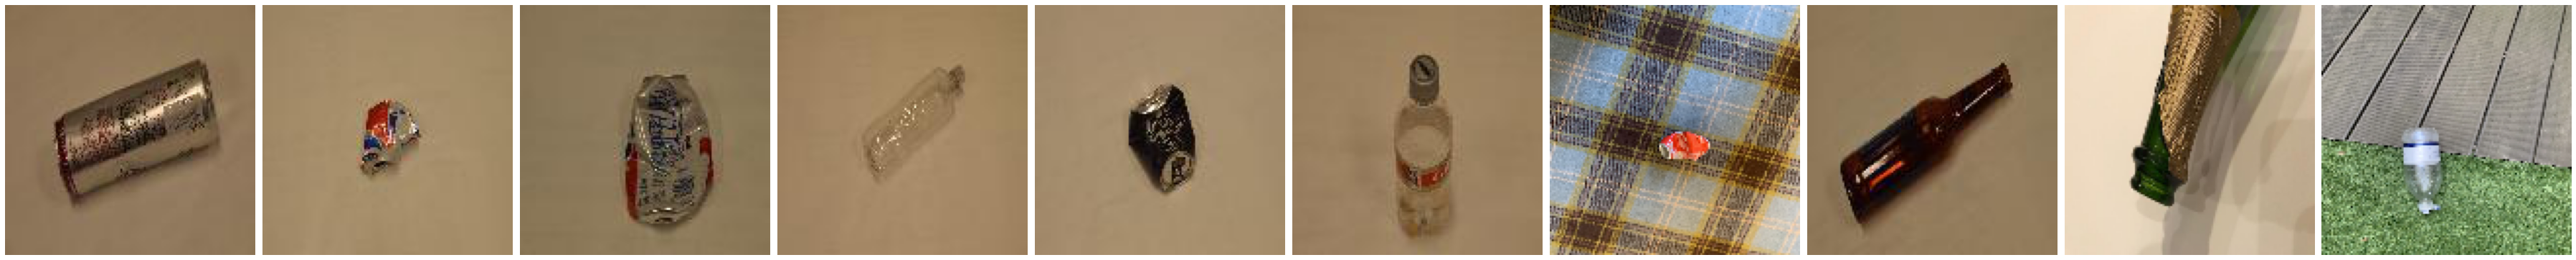

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [66]:
test_imgs, test_labels = next(validation_generator)
plotImages(test_imgs)
print(test_labels[:10])

# Evaluate Model on Test Set

In [67]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)


predictions = model_t.predict(x=test_generator, steps=len(test_generator), verbose=2)
predictions = np.round(predictions)
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))
y = test_generator.classes

Found 350 images belonging to 4 classes.
35/35 - 1s


In [69]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)

loss, acc = model_t.evaluate(test_generator, steps=len(test_generator), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


Found 350 images belonging to 4 classes.
35/35 - 1s - loss: 0.0518 - acc: 0.9743
Restored model, accuracy: 97.43%


{'AluCan': 0, 'Glass': 1, 'HDPEM': 2, 'PET': 3}
Confusion matrix, without normalization
[[95  4  1  0]
 [ 0 99  0  1]
 [ 0  1 49  0]
 [ 1  1  0 98]]


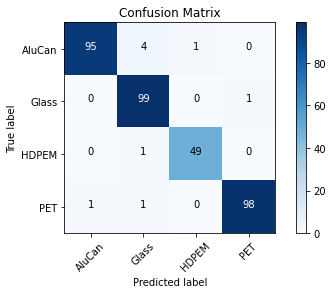

In [70]:
print(validation_generator.class_indices)
cm_plot_labels = ['AluCan', 'Glass', 'HDPEM', 'PET']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [71]:
report = metrics.classification_report(test_generator.classes, np.argmax(predictions, axis=-1), target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      AluCan       0.99      0.95      0.97       100
       Glass       0.94      0.99      0.97       100
       HDPEM       0.98      0.98      0.98        50
         PET       0.99      0.98      0.98       100

    accuracy                           0.97       350
   macro avg       0.98      0.97      0.98       350
weighted avg       0.97      0.97      0.97       350



In [72]:
val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle = False)

predictions = model_t.predict(x=validation_generator, steps=len(validation_generator), verbose=2)
predictions = np.round(predictions)
cm = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions, axis=-1))
y = validation_generator.classes

Found 1750 images belonging to 4 classes.
55/55 - 8s


In [73]:
loss, acc = model_t.evaluate(validation_generator, steps=len(validation_generator), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

55/55 - 7s - loss: 0.0706 - acc: 0.9777
Restored model, accuracy: 97.77%


{'AluCan': 0, 'Glass': 1, 'HDPEM': 2, 'PET': 3}
Confusion matrix, without normalization
[[482  10   7   1]
 [ 12 476  11   1]
 [  3  20 227   0]
 [ 16  36  13 435]]


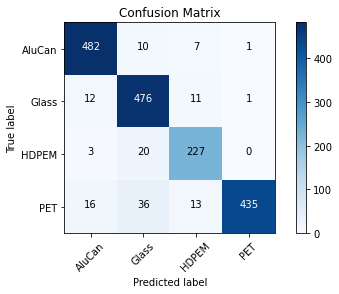

In [42]:
print(validation_generator.class_indices)
cm_plot_labels = ['AluCan', 'Glass', 'HDPEM', 'PET']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [74]:
class_labels = list(validation_generator.class_indices.keys()) 
report = metrics.classification_report(validation_generator.classes, np.argmax(predictions, axis=-1), target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

      AluCan       0.99      0.97      0.98       500
       Glass       0.97      0.98      0.98       500
       HDPEM       0.93      0.99      0.96       250
         PET       1.00      0.97      0.98       500

    accuracy                           0.98      1750
   macro avg       0.97      0.98      0.98      1750
weighted avg       0.98      0.98      0.98      1750



# Predict Classes

In [98]:
# validation_generator.samples
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)
predictions = model.predict(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get Ground-Truth Classes and Class-labels

In [103]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

In [108]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      AluCan       0.30      0.30      0.30       500
       Glass       0.28      0.30      0.29       500
       HDPEM       0.11      0.10      0.11       250
         PET       0.29      0.27      0.28       500

    accuracy                           0.26      1750
   macro avg       0.24      0.24      0.24      1750
weighted avg       0.26      0.26      0.26      1750



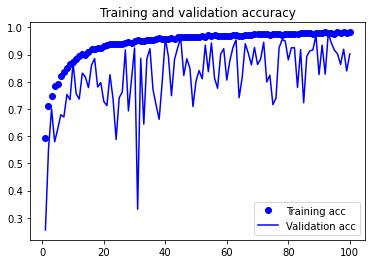

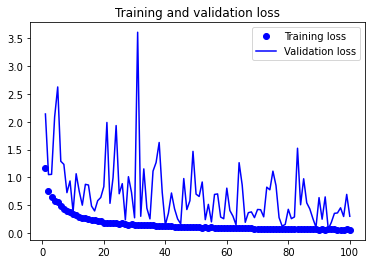

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [69]:
# # import matplotlib.pyplot as plt
# # plt.clf()
# fnames = [os.path.join(train_cans_dir, fname) for
#     fname in os.listdir(train_cans_dir)]

# can_classes = []
# for i in range(len(fnames)):
#     img_path = fnames[i]
#     img = image.load_img(img_path, target_size=(150, 150))

#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)
#     i=0
# #     plt.figure(i)
# #     imgplot = plt.imshow(image.array_to_img(x[0]))
#     img_class = model.predict(x)
#     prediction = img_class[0]
#     classname = img_class[0]
# #     print("Class: ",classname)
#     classes.append(list(classname).index(max(classname)))
#     #     plt.show()
    
    
# print("HI")
    
# fnames = [os.path.join(train_glass_dir, fname) for
#     fname in os.listdir(train_glass_dir)]

# glass_classes = []
# for i in range(len(fnames)):
#     img_path = fnames[i]
#     img = image.load_img(img_path, target_size=(150, 150))

#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)
#     i=0
# #     plt.figure(i)
# #     imgplot = plt.imshow(image.array_to_img(x[0]))
#     img_class = model.predict(x)
#     prediction = img_class[0]
#     classname = img_class[0]
# #     print("Class: ",classname)
#     glass_classes.append(list(classname).index(max(classname)))
#     #     plt.show()

# print("HI")

    
# fnames = [os.path.join(train_hdpem_dir, fname) for
#     fname in os.listdir(train_hdpem_dir)]

# hdpem_classes = []
# for i in range(len(fnames)):
#     img_path = fnames[i]
#     img = image.load_img(img_path, target_size=(150, 150))

#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)
#     i=0
# #     plt.figure(i)
# #     imgplot = plt.imshow(image.array_to_img(x[0]))
#     img_class = model.predict(x)
#     prediction = img_class[0]
#     classname = img_class[0]
# #     print("Class: ",classname)
#     hdpem_classes.append(list(classname).index(max(classname)))
#     #     plt.show()
    
# print("HI")

# fnames = [os.path.join(train_pet_dir, fname) for
# fname in os.listdir(train_pet_dir)]

# pet_classes = []
# for i in range(len(fnames)):
#     img_path = fnames[i]
#     img = image.load_img(img_path, target_size=(150, 150))

#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)
#     i=0
# #     plt.figure(i)
# #     imgplot = plt.imshow(image.array_to_img(x[0]))
#     img_class = model.predict(x)
#     prediction = img_class[0]
#     classname = img_class[0]
# #     print("Class: ",classname)
#     pet_classes.append(list(classname).index(max(classname)))
#     #     plt.show()



HI
HI
HI


In [68]:
classes.count(0) / len(classes)

0.632